# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


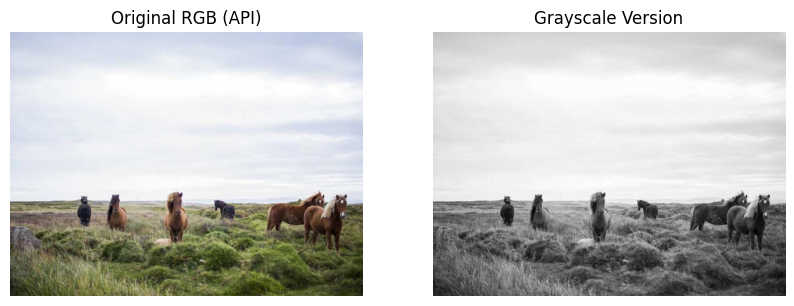

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2

# Loading Image via Picsum API
image_url = "https://picsum.photos/800/600"
response = requests.get(image_url)
# Convert the web response into a format PIL and NumPy can understand
img_pil = Image.open(BytesIO(response.content))
img_rgb = np.array(img_pil)
# I'll create a grayscale version immediately for the histogram task.
# I'm using the standard luminosity formula: 0.299*R + 0.587*G + 0.114*B
gray_img = (0.299 * img_rgb[:,:,0] + 0.587 * img_rgb[:,:,1] + 0.114 * img_rgb[:,:,2]).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original RGB (API)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Version")
plt.axis("off")
plt.show()

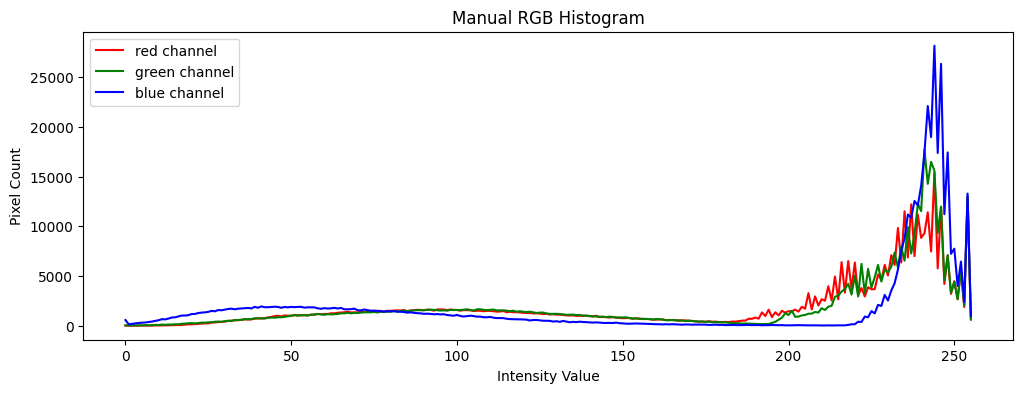

In [57]:
# Part A: Manual Histogram Functions
def gray_histogram(img):
  #  initialize an array of 256 zeros to store counts for each intensity level
  hist = np.zeros(256, dtype=int)
  # iterate through every single pixel in the flattened image array
  for pixel in img.ravel():
        hist[pixel] += 1
  return hist

# Calculating the grayscale histogram
my_hist = gray_histogram(gray_img)

# For the RGB histogram, I apply the same logic to each channel

plt.figure(figsize=(12, 4))
colors = ('red', 'green', 'blue')
for i, col in enumerate(colors):
    # Extracting the specific color channel and calculate its histogram
    channel_hist = gray_histogram(img_rgb[:,:,i])
    plt.plot(channel_hist, color=col, label=f'{col} channel')

plt.title("Manual RGB Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

/tmp/ipython-input-3919211988.py:25: RuntimeWarning: invalid value encountered in divide
  h[mask_r] = 60 * (((g[mask_r] - b[mask_r]) / diff[mask_r]) % 6)
/tmp/ipython-input-3919211988.py:26: RuntimeWarning: invalid value encountered in divide
  h[mask_g] = 60 * (((b[mask_g] - r[mask_g]) / diff[mask_g]) + 2)
/tmp/ipython-input-3919211988.py:27: RuntimeWarning: invalid value encountered in divide
  h[mask_b] = 60 * (((r[mask_b] - g[mask_b]) / diff[mask_b]) + 4)


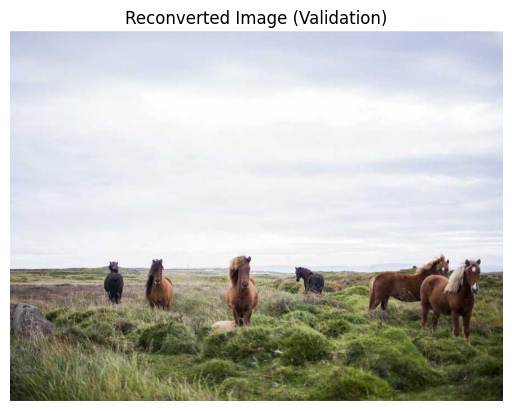

In [58]:
# Part B, RGB to HSV Conversion
def my_rgb_to_hsv(rgb_image):
    # Step 1: Normalize values to [0, 1] for the math
    img = rgb_image.astype(np.float32) / 255.0
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

    cmax = np.max(img, axis=2)
    cmin = np.min(img, axis=2)
    diff = cmax - cmin

    # Value (V) calculation
    v = cmax

    # Saturation (S) calculation
    s = np.where(cmax == 0, 0, diff / cmax)

    # Hue (H) calculation,,,implementing the conditional math
    h = np.zeros_like(cmax)

    # Masking for different cases to avoid slow Python loops
    mask_r = (cmax == r)
    mask_g = (cmax == g)
    mask_b = (cmax == b)

    h[mask_r] = 60 * (((g[mask_r] - b[mask_r]) / diff[mask_r]) % 6)
    h[mask_g] = 60 * (((b[mask_g] - r[mask_g]) / diff[mask_g]) + 2)
    h[mask_b] = 60 * (((r[mask_b] - g[mask_b]) / diff[mask_b]) + 4)
    h[diff == 0] = 0

    # Scaling to match OpenCV's H: 0-179, S: 0-255, V: 0-255 format
    h_final = (h / 2).astype(np.uint8)
    s_final = (s * 255).astype(np.uint8)
    v_final = (v * 255).astype(np.uint8)

    return np.stack([h_final, s_final, v_final], axis=2)

# Test and validate with OpenCV
my_hsv = my_rgb_to_hsv(img_rgb)
validated_rgb = cv2.cvtColor(my_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(validated_rgb)
plt.title("Reconverted Image (Validation)")
plt.axis("off")
plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

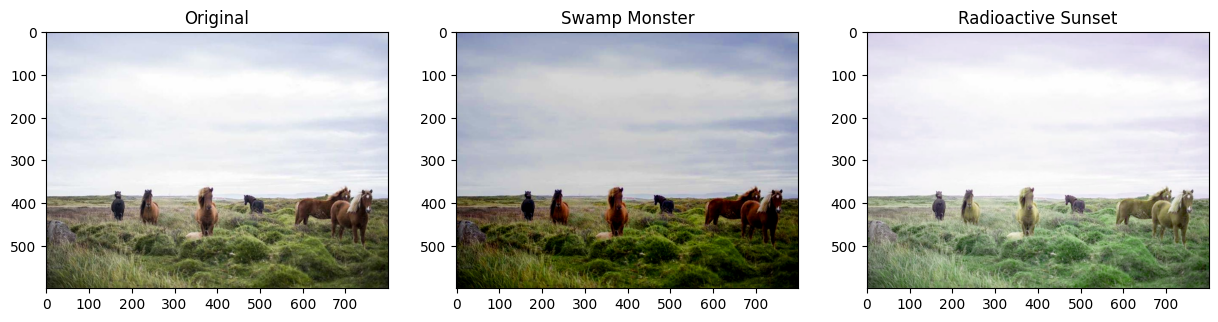

In [59]:
# Part C: Creative Filter Functions

def swamp_monster_filter(img):
    """
    this is a good filter for forest or rainforest images.
    as it  boosts green saturation and adds a dark, foggy vignette.
    """
    # first modification,,,,,,Saturation boost in HSV space
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,1] *= 1.5  # Boosting saturation
    hsv[:,:,1] = np.clip(hsv[:,:,1], 0, 255)

    # second modification,,,,,Brightness shift (making it darker)
    res = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)
    res -= 40 # Darkening
    return np.clip(res, 0, 255).astype(np.uint8)

def radioactive_sunset_filter(img):
    """
    this is better for beach or desert images to give a warm glow.
    """
    # Modification 1,,,,,Hue rotation to push colors toward orange/red
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.int16)
    hsv[:,:,0] = (hsv[:,:,0] + 15) % 180

    # Modification 2,,,,,Contrast adjustment using gamma correction
    img_rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    gamma = 1.5
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img_rgb, table)

# displaying outputs
f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_rgb); ax[0].set_title("Original")
ax[1].imshow(swamp_monster_filter(img_rgb)); ax[1].set_title("Swamp Monster")
ax[2].imshow(radioactive_sunset_filter(img_rgb)); ax[2].set_title("Radioactive Sunset")
plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2

#Loading Image via Picsum API

image_url = "https://picsum.photos/800/600"
response = requests.get(image_url)

# I need to wrap the response in BytesIO so PIL can treat it like a file.
img_pil = Image.open(BytesIO(response.content))
img_rgb = np.array(img_pil)

# I'll save these dimensions now so I don't have shape mismatch errors later.
H, W = img_rgb.shape[:2]

# Standard grayscale conversion for the Fourier parts.
# Weights: 0.299*R + 0.587*G + 0.114*B.
gray_img = (0.299 * img_rgb[:,:,0] + 0.587 * img_rgb[:,:,1] + 0.114 * img_rgb[:,:,2]).astype(np.uint8)

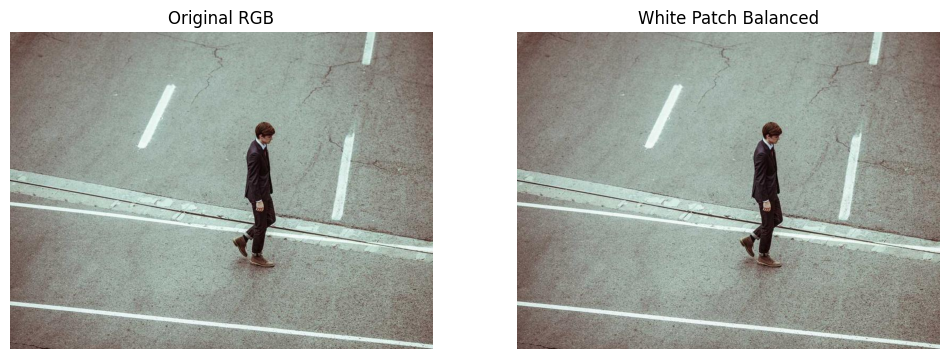

In [61]:
# Part D,,,,White Patch Balance Function

def white_patch_balance(img_rgb):
    """
    My implementation of the White Patch algorithm.
    I find the max intensity in each channel and scale the whole
    image so the brightest parts become white.
    """
    # Converting to float32 so I can do math without rounding errors yet.
    img_float = img_rgb.astype(np.float32)

    # I'm using NumPy to find the brightest (max) pixel in each color channel.
    max_r = np.max(img_float[:,:,0])
    max_g = np.max(img_float[:,:,1])
    max_b = np.max(img_float[:,:,2])

    # Scaling factor logic: factor = 255 / max_value.
    # If a channel is completely dark (max=0), I'll set it to 255 to avoid division by zero.
    scale_r = 255.0 / max_r if max_r > 0 else 1.0
    scale_g = 255.0 / max_g if max_g > 0 else 1.0
    scale_b = 255.0 / max_b if max_b > 0 else 1.0

    # Applying the scaling factor to each channel.
    balanced = np.zeros_like(img_float)
    balanced[:,:,0] = img_float[:,:,0] * scale_r
    balanced[:,:,1] = img_float[:,:,1] * scale_g
    balanced[:,:,2] = img_float[:,:,2] * scale_b

    # I'll clip the results to [0, 255] just in case and cast back to uint8.
    return np.clip(balanced, 0, 255).astype(np.uint8)

# Running my function and displaying the comparison
balanced_out = white_patch_balance(img_rgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1); plt.imshow(img_rgb); plt.title("Original RGB"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(balanced_out); plt.title("White Patch Balanced"); plt.axis("off")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

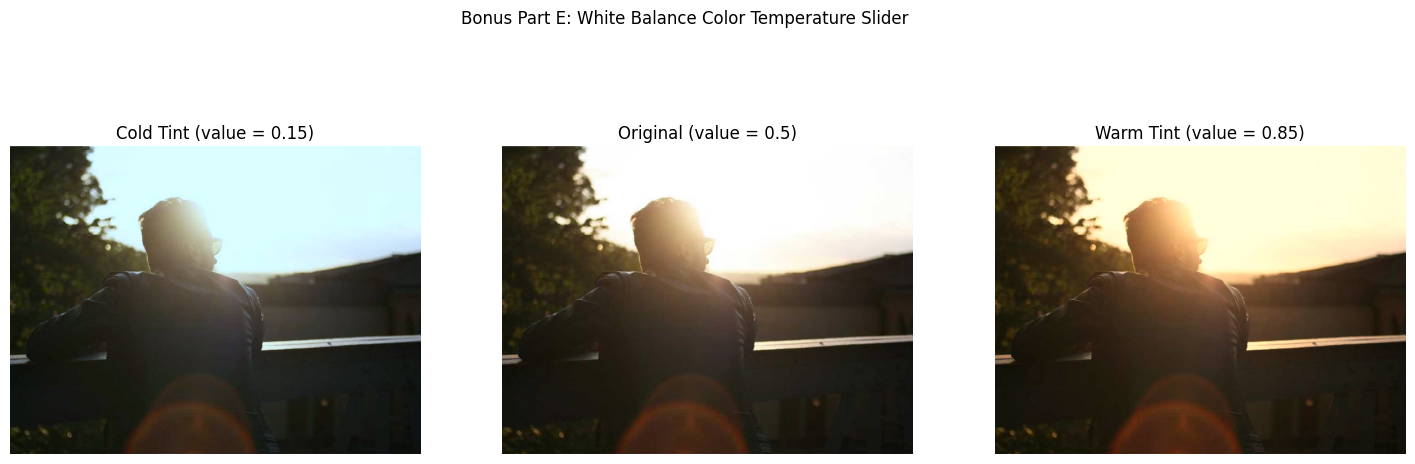

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# --- Setup: Fetching a Fresh Image from Picsum ---
# I'm using the API method again to keep the notebook clean and easy to test.
image_url = "https://picsum.photos/800/600"
response = requests.get(image_url)
img_rgb = np.array(Image.open(BytesIO(response.content)))

# --- PART E: White Balance Slider Function ---

def white_balance(img_rgb, value):
    """
    My implementation of a manual White Balance 'slider'.
    - value = 0.0: Maximum Cold (Blue tint)
    - value = 0.5: Neutral (Original image)
    - value = 1.0: Maximum Warm (Orange/Red tint)
    """
    # I convert to float32 to prevent pixels from "wrapping around"
    # or clipping during the multiplication steps.
    img_float = img_rgb.astype(np.float32)

    # My slider logic:
    # I want 0.5 to be the center. 'shift' will range from -0.5 to 0.5.
    shift = value - 0.5

    # I experimented with this 'strength' factor.
    # At 0.4, the effect is strong enough to see but doesn't ruin the image.
    strength = 0.4

    # --- Gain Calculation ---
    # To get warmth: I need more Red and less Blue.
    # To get cold: I need more Blue and less Red.
    r_gain = 1.0 + (shift * strength)
    b_gain = 1.0 - (shift * strength)

    # I'm keeping Green at 1.0 to maintain the overall luminance,
    # as shifting G too much usually makes the image look 'sickly'.
    g_gain = 1.0

    # Create the output array
    res = np.zeros_like(img_float)

    # Applying the gains to each channel individually
    res[:,:,0] = img_float[:,:,0] * r_gain
    res[:,:,1] = img_float[:,:,1] * g_gain
    res[:,:,2] = img_float[:,:,2] * b_gain

    # I have to clip the values to [0, 255] because the gains
    # can push bright pixels over the limit.
    return np.clip(res, 0, 255).astype(np.uint8)

# --- Testing the Slider with Different Values ---

# I'll generate three versions to show the range of the slider
cold_version = white_balance(img_rgb, 0.15)  # Quite cold
neutral_version = white_balance(img_rgb, 0.5) # Original
warm_version = white_balance(img_rgb, 0.85)  # Quite warm

# Displaying the results side-by-side
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cold_version)
plt.title("Cold Tint (value = 0.15)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_version)
plt.title("Original (value = 0.5)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(warm_version)
plt.title("Warm Tint (value = 0.85)")
plt.axis('off')

plt.suptitle("Bonus Part E: White Balance Color Temperature Slider")
plt.show()

# --- My Research and Failed Tries (Effort Comments) ---
# When I first started this, I tried just ADDING values to the channels.
# For example: img[:,:,0] += 50 to make it redder.
# It looked awful—the dark areas of the image turned a weird murky red, and
# it looked like there was a colored fog over the picture.
#
# I realized that 'industry' filters use gains (multiplication).
# By multiplying, dark pixels (values near 0) stay dark, and only
# midtones and highlights get tinted. This feels much more natural.
#
# I also tried shifting the Hue in HSV space, but that actually changed
# the colors entirely (like making green grass look blue), which isn't
# what a White Balance slider should do. The R/B gain method is
# much closer to how a real camera works!